In [1]:
import spotchaos.syntheticSignals as sp

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import time
import tqdm
import pickle
from astropy.timeseries import LombScargle
from scipy.integrate import RK45, DOP853
from scipy.stats import chi2, iqr
from scipy.signal import argrelextrema
from scipy.spatial.distance import chebyshev
from scipy.optimize import curve_fit

In [2]:
rArr = np.load("./corrDimTesting/rArr.npy")

rArr = np.load("./corrDimTesting/rArr.npy")
C0_1000_t15_m3 = np.load("./corrDimTesting/lorenz_x_C0_1000_tau=15_m=3.npy")
C0_5000_t15_m3 = np.load("./corrDimTesting/lorenz_x_C0_5000_tau=15_m=3.npy")
C0_10000_t15_m3 = np.load("./corrDimTesting/lorenz_x_C0_10000_tau=15_m=3.npy")
C0_20000_t15_m3 = np.load("./corrDimTesting/lorenz_x_C0_20000_tau=15_m=3.npy")

C0_1000_t60_m3 = np.load("./corrDimTesting/lorenz_x_C0_1000_tau=60_m=3.npy")
C0_5000_t60_m3 = np.load("./corrDimTesting/lorenz_x_C0_5000_tau=60_m=3.npy")
C0_10000_t60_m3 = np.load("./corrDimTesting/lorenz_x_C0_10000_tau=60_m=3.npy")
C0_20000_t60_m3 = np.load("./corrDimTesting/lorenz_x_C0_20000_tau=60_m=3.npy")

C0_1000_t15_m4 = np.load("./corrDimTesting/lorenz_x_C0_1000_tau=15_m=4.npy")
C0_5000_t15_m4 = np.load("./corrDimTesting/lorenz_x_C0_5000_tau=15_m=4.npy")
C0_10000_t15_m4 = np.load("./corrDimTesting/lorenz_x_C0_10000_tau=15_m=4.npy")
C0_20000_t15_m4 = np.load("./corrDimTesting/lorenz_x_C0_20000_tau=15_m=4.npy")

C0_1000_t60_m4 = np.load("./corrDimTesting/lorenz_x_C0_1000_tau=60_m=4.npy")
C0_5000_t60_m4 = np.load("./corrDimTesting/lorenz_x_C0_5000_tau=60_m=4.npy")
C0_10000_t60_m4 = np.load("./corrDimTesting/lorenz_x_C0_10000_tau=60_m=4.npy")
C0_20000_t60_m4 = np.load("./corrDimTesting/lorenz_x_C0_20000_tau=60_m=4.npy")

C1_1000_t15_m3 = np.load("./corrDimTesting/lorenz_x_C1_1000_tau=15_m=3.npy")
C1_5000_t15_m3 = np.load("./corrDimTesting/lorenz_x_C1_5000_tau=15_m=3.npy")
C1_10000_t15_m3 = np.load("./corrDimTesting/lorenz_x_C1_10000_tau=15_m=3.npy")
C1_20000_t15_m3 = np.load("./corrDimTesting/lorenz_x_C1_20000_tau=15_m=3.npy")

C1_1000_t60_m3 = np.load("./corrDimTesting/lorenz_x_C1_1000_tau=60_m=3.npy")
C1_5000_t60_m3 = np.load("./corrDimTesting/lorenz_x_C1_5000_tau=60_m=3.npy")
C1_10000_t60_m3 = np.load("./corrDimTesting/lorenz_x_C1_10000_tau=60_m=3.npy")
C1_20000_t60_m3 = np.load("./corrDimTesting/lorenz_x_C1_20000_tau=60_m=3.npy")

C1_1000_t15_m4 = np.load("./corrDimTesting/lorenz_x_C1_1000_tau=15_m=4.npy")
C1_5000_t15_m4 = np.load("./corrDimTesting/lorenz_x_C1_5000_tau=15_m=4.npy")
C1_10000_t15_m4 = np.load("./corrDimTesting/lorenz_x_C1_10000_tau=15_m=4.npy")
C1_20000_t15_m4 = np.load("./corrDimTesting/lorenz_x_C1_20000_tau=15_m=4.npy")

C1_1000_t60_m4 = np.load("./corrDimTesting/lorenz_x_C1_1000_tau=60_m=4.npy")
C1_5000_t60_m4 = np.load("./corrDimTesting/lorenz_x_C1_5000_tau=60_m=4.npy")
C1_10000_t60_m4 = np.load("./corrDimTesting/lorenz_x_C1_10000_tau=60_m=4.npy")
C1_20000_t60_m4 = np.load("./corrDimTesting/lorenz_x_C1_20000_tau=60_m=4.npy")

C2_1000_t15_m3 = np.load("./corrDimTesting/lorenz_x_C2_1000_tau=15_m=3.npy")
C2_5000_t15_m3 = np.load("./corrDimTesting/lorenz_x_C2_5000_tau=15_m=3.npy")
C2_10000_t15_m3 = np.load("./corrDimTesting/lorenz_x_C2_10000_tau=15_m=3.npy")
C2_20000_t15_m3 = np.load("./corrDimTesting/lorenz_x_C2_20000_tau=15_m=3.npy")

C2_1000_t60_m3 = np.load("./corrDimTesting/lorenz_x_C2_1000_tau=60_m=3.npy")
C2_5000_t60_m3 = np.load("./corrDimTesting/lorenz_x_C2_5000_tau=60_m=3.npy")
C2_10000_t60_m3 = np.load("./corrDimTesting/lorenz_x_C2_10000_tau=60_m=3.npy")
C2_20000_t60_m3 = np.load("./corrDimTesting/lorenz_x_C2_20000_tau=60_m=3.npy")

C2_1000_t15_m4 = np.load("./corrDimTesting/lorenz_x_C2_1000_tau=15_m=4.npy")
C2_5000_t15_m4 = np.load("./corrDimTesting/lorenz_x_C2_5000_tau=15_m=4.npy")
C2_10000_t15_m4 = np.load("./corrDimTesting/lorenz_x_C2_10000_tau=15_m=4.npy")
C2_20000_t15_m4 = np.load("./corrDimTesting/lorenz_x_C2_20000_tau=15_m=4.npy")

C2_1000_t60_m4 = np.load("./corrDimTesting/lorenz_x_C2_1000_tau=60_m=4.npy")
C2_5000_t60_m4 = np.load("./corrDimTesting/lorenz_x_C2_5000_tau=60_m=4.npy")
C2_10000_t60_m4 = np.load("./corrDimTesting/lorenz_x_C2_10000_tau=60_m=4.npy")
C2_20000_t60_m4 = np.load("./corrDimTesting/lorenz_x_C2_20000_tau=60_m=4.npy")

nArr_1000_t15_m3 = np.load("./corrDimTesting/lorenz_x_nArr_1000_tau=15_m=3.npy")
nArr_5000_t15_m3 = np.load("./corrDimTesting/lorenz_x_nArr_5000_tau=15_m=3.npy")
nArr_10000_t15_m3 = np.load("./corrDimTesting/lorenz_x_nArr_10000_tau=15_m=3.npy")
nArr_20000_t15_m3 = np.load("./corrDimTesting/lorenz_x_nArr_20000_tau=15_m=3.npy")

nArr_1000_t60_m3 = np.load("./corrDimTesting/lorenz_x_nArr_1000_tau=60_m=3.npy")
nArr_5000_t60_m3 = np.load("./corrDimTesting/lorenz_x_nArr_5000_tau=60_m=3.npy")
nArr_10000_t60_m3 = np.load("./corrDimTesting/lorenz_x_nArr_10000_tau=60_m=3.npy")
nArr_20000_t60_m3 = np.load("./corrDimTesting/lorenz_x_nArr_20000_tau=60_m=3.npy")

nArr_1000_t15_m4 = np.load("./corrDimTesting/lorenz_x_nArr_1000_tau=15_m=4.npy")
nArr_5000_t15_m4 = np.load("./corrDimTesting/lorenz_x_nArr_5000_tau=15_m=4.npy")
nArr_10000_t15_m4 = np.load("./corrDimTesting/lorenz_x_nArr_10000_tau=15_m=4.npy")
nArr_20000_t15_m4 = np.load("./corrDimTesting/lorenz_x_nArr_20000_tau=15_m=4.npy")

nArr_1000_t60_m4 = np.load("./corrDimTesting/lorenz_x_nArr_1000_tau=60_m=4.npy")
nArr_5000_t60_m4 = np.load("./corrDimTesting/lorenz_x_nArr_5000_tau=60_m=4.npy")
nArr_10000_t60_m4 = np.load("./corrDimTesting/lorenz_x_nArr_10000_tau=60_m=4.npy")
nArr_20000_t60_m4 = np.load("./corrDimTesting/lorenz_x_nArr_20000_tau=60_m=4.npy")

In [3]:
print(np.shape(C0_1000_t15_m3))
print(np.shape(C1_1000_t15_m3))
print(np.shape(C2_1000_t15_m3))
print(np.shape(nArr_1000_t15_m3))

print(np.shape(C0_5000_t15_m3))
print(np.shape(C1_5000_t15_m3))
print(np.shape(C2_5000_t15_m3))
print(np.shape(nArr_5000_t15_m3))

(50,)
(50,)
(50,)
(970, 50)
(50,)
(50,)
(50,)
(4970, 50)


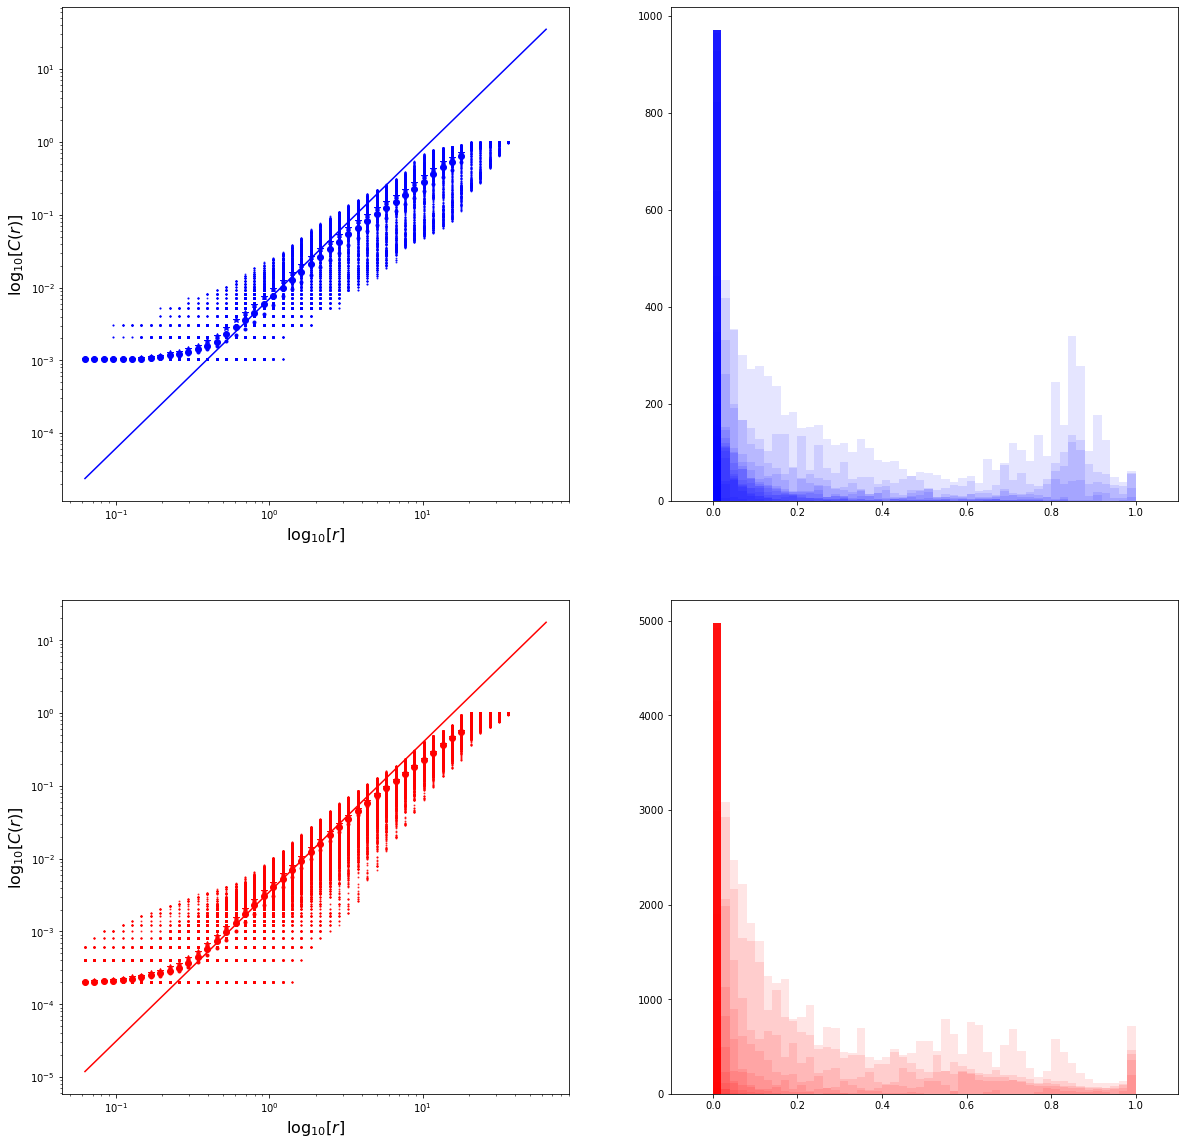

In [4]:
fig, axes = plt.subplots(2,2,figsize=(20,20))

axes[0,0].plot(rArr,C0_1000_t15_m3,'b.')
axes[0,0].plot(rArr,C1_1000_t15_m3,'bo')
axes[0,0].plot(rArr,C2_1000_t15_m3,'b*')
axes[0,0].plot(rArr,0.007*rArr**2.05, 'b-')
for i in range(0,np.shape(nArr_1000_t15_m3)[1]):
#for i in range(10):
    axes[0,0].plot(rArr[i]*np.ones_like(nArr_1000_t15_m3[:,i]),nArr_1000_t15_m3[:,i],color='b',marker='.',ls='None',ms=2,alpha=0.7)
    axes[0,1].hist(nArr_1000_t15_m3[:,i][np.isfinite(nArr_1000_t15_m3[:,i])],bins=50,range=(0.,1.),color='b',alpha=0.1)


axes[1,0].plot(rArr,C0_5000_t15_m3,'r.')
axes[1,0].plot(rArr,C1_5000_t15_m3,'ro')
axes[1,0].plot(rArr,C2_5000_t15_m3,'r*')
axes[1,0].plot(rArr,0.0035*rArr**2.05, 'r-')
for i in range(0,np.shape(nArr_5000_t15_m3)[1]):
#for i in range(10):
    axes[1,0].plot(rArr[i]*np.ones_like(nArr_5000_t15_m3[:,i]),nArr_5000_t15_m3[:,i],color='r',marker='.',ls='None',ms=2,alpha=0.7)
    axes[1,1].hist(nArr_5000_t15_m3[:,i][np.isfinite(nArr_5000_t15_m3[:,i])],bins=50,range=(0.,1.),color='r',alpha=0.1)


for ax in axes[:,0]:
    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.set_xlabel(r"$\log_{10}[r]$", fontsize=16)
    ax.set_ylabel(r"$\log_{10}[C(r)]$", fontsize=16)
for ax in axes[:,1]:
    ax.set_xlim(-0.1,1.1)
    
plt.show()

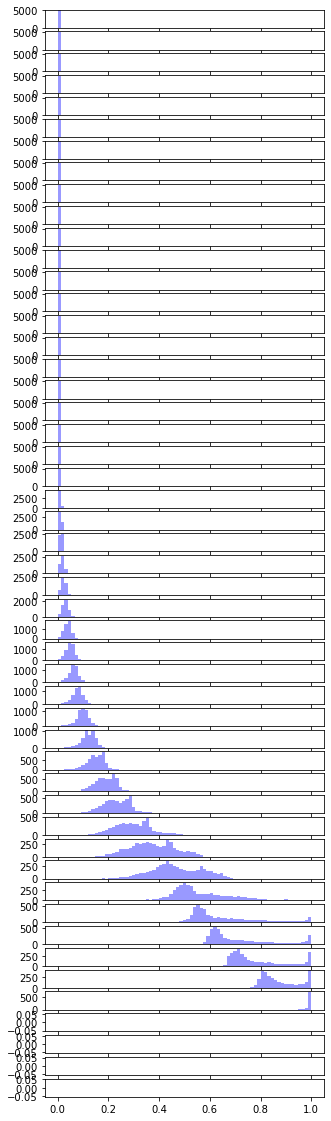

In [5]:
fig, axes = plt.subplots(np.shape(nArr_5000_t15_m3)[1],1,figsize=(5,20))

for i in range(0,np.shape(nArr_5000_t15_m3)[1]):
    axes[i].hist(nArr_5000_t15_m3[:,i][np.isfinite(nArr_5000_t15_m3[:,i])],bins=75,range=(0.,1.),color='b',alpha=0.4)
plt.show()